In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [8]:
df = pd.read_csv(r"C:\Users\karna_mfhs0lv\Downloads\StudentsPerformance_3_lyst1729690388778.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
X = df.drop(columns=['math score'], axis = 1)

In [11]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
Y = df["math score"]

In [13]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [17]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [18]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [20]:
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans= StandardScaler()
oh_tran=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_tran,cat_cols),
        ("StandardScaler",num_trans,num_cols),

    ]

)

In [21]:
x = preprocessor.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=23)

In [25]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2

In [27]:
models={
    "LR":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor()

}

model_list=[]
r2_list=[]


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate the model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # Use squared=False for RMSE
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2  # Ensure you return exactly three values

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=23)

# List to store model names and performance metrics
model_list = []
r2_list = []  # Initialize r2_list

# Iterate over models
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('--------------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)  # Append R2 score to the list

    print('=' * 35)
    print('\n')


C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared'

LR
Model performance for Training set
- Root Mean Squared Error: 5.2644
- Mean Absolute Error: 4.1721
- R2 Score: 0.8813
--------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6156
- Mean Absolute Error: 4.5705
- R2 Score: 0.8527


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5500
- Mean Absolute Error: 5.1997
- R2 Score: 0.8162
--------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5967
- Mean Absolute Error: 5.1005
- R2 Score: 0.7967


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2594
- Mean Absolute Error: 4.1672
- R2 Score: 0.8815
--------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6191
- Mean Absolute Error: 4.5672
- R2 Score: 0.8525




C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared'

KNN
Model performance for Training set
- Root Mean Squared Error: 5.7673
- Mean Absolute Error: 4.5682
- R2 Score: 0.8575
--------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.1230
- Mean Absolute Error: 5.7290
- R2 Score: 0.7630


DT
Model performance for Training set
- Root Mean Squared Error: 0.1250
- Mean Absolute Error: 0.0063
- R2 Score: 0.9999
--------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.7738
- Mean Absolute Error: 7.1200
- R2 Score: 0.6404


RF
Model performance for Training set
- Root Mean Squared Error: 2.2479
- Mean Absolute Error: 1.7732
- R2 Score: 0.9783
--------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4374
- Mean Absolute Error: 5.1509
- R2 Score: 0.8064




C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\karna_mfhs0lv\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
0,LR,0.852703
2,Ridge,0.852517
5,RF,0.806435
1,Lasso,0.796734
3,KNN,0.763004
4,DT,0.640427


In [41]:
#LINEAR REGRESSION
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of model is %.2f" % score)

Accuracy of model is 85.27


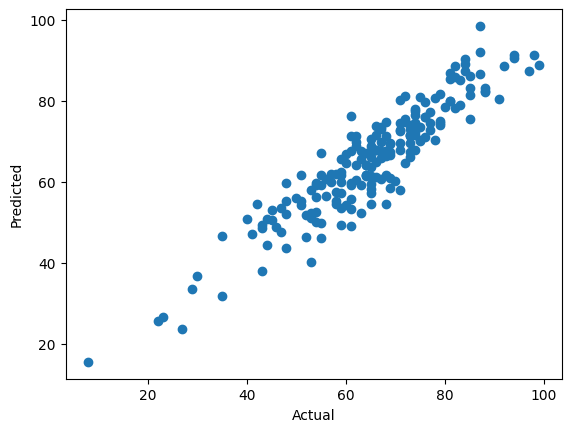

In [42]:
#PLOTTING

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

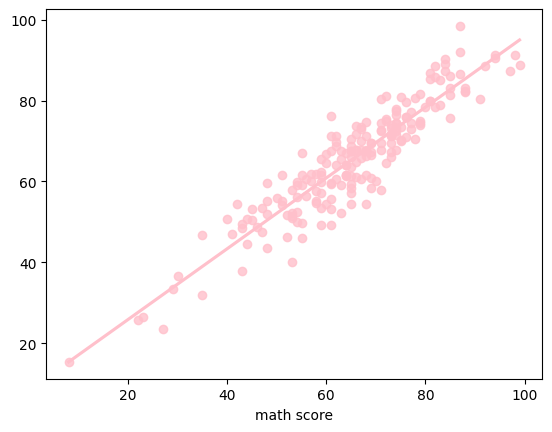

In [43]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='pink');

In [44]:
#DIFF BETWEEN ACTUAL AND PREDICTED


pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
519,67,65.75000,1.25000
837,75,70.06250,4.93750
208,74,67.78125,6.21875
525,68,71.31250,-3.31250
978,55,49.68750,5.31250
...,...,...,...
647,64,61.56250,2.43750
481,52,46.37500,5.62500
134,74,73.15625,0.84375
366,69,58.34375,10.65625
